In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

#from numpy import mean
#from sklearn.datasets import make_classification
#from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import RandomOverSampler

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100, verbose = 10)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [3]:
data = pd.read_csv('../../Data/G_12_feat_scaled.csv')

In [4]:
data.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,pub_rec,term,sub_grade,emp_length,Not Verified,Source Verified,Verified,ANY,MORTGAGE,NONE,OWN,RENT,loan_status_bin
0,1.048421,-0.091987,0.896021,0.757086,-0.232455,-0.185394,-0.403489,0.446684,-0.356910,-1.192676,-0.255685,-0.707630,0.808060,-0.02094,1.094521,-0.010468,-0.366949,-0.861164,0.0
1,-0.151844,-0.288444,-0.256434,-0.383695,-0.202987,1.630793,1.202374,0.446684,-1.079438,-1.449304,-0.255685,-0.707630,0.808060,-0.02094,1.094521,-0.010468,-0.366949,-0.861164,0.0
2,-0.385771,0.104469,-0.440006,-0.610289,-0.250258,-0.963760,1.202374,0.446684,0.365619,-0.422792,-0.255685,1.413168,-1.237531,-0.02094,-0.913641,-0.010468,-0.366949,1.161219,1.0
3,-0.984511,0.300926,-0.998500,-0.942366,0.039504,0.592972,-0.403489,0.446684,1.088147,-1.192676,-0.255685,-0.707630,0.808060,-0.02094,-0.913641,-0.010468,2.725178,-0.861164,0.0
4,-0.480455,-0.091987,-0.546951,-0.766560,-0.171678,0.333516,-0.403489,0.446684,-0.356910,-1.192676,-0.255685,-0.707630,0.808060,-0.02094,-0.913641,-0.010468,-0.366949,1.161219,0.0


In [5]:
data.shape

(9126, 19)

In [6]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(9126, 18)

In [7]:
y = data['loan_status_bin']

In [8]:
steps = [('model', cb)]
pipeline = Pipeline(steps=steps)

In [9]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

print(scores)
score = np.mean(scores)
print(score)

[0.5618839  0.58191781 0.55835616 0.57534247 0.56657534]
0.5688151360110429


In [13]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[2671, 1885],
       [2050, 2520]])

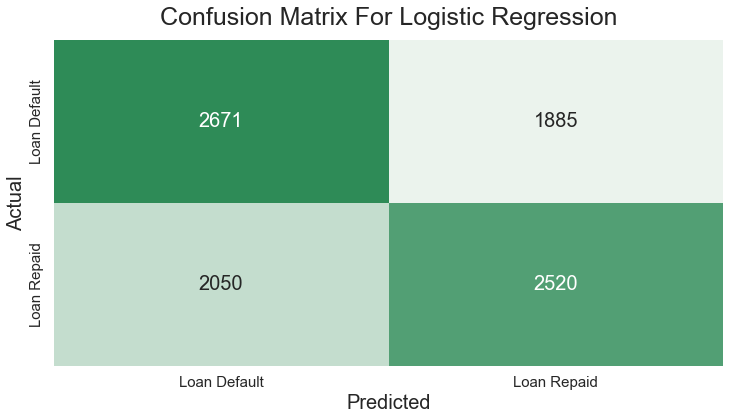

In [16]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [17]:
accuracy_score(y, y_pred)

0.5688143765066842

In [18]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

2520
1885
2050
2671
0.5688143765066842


In [23]:
cb.fit(X,y)

Learning rate set to 0.218763
0:	learn: 0.6876820	total: 64.3ms	remaining: 6.37s
10:	learn: 0.6679391	total: 94.9ms	remaining: 768ms
20:	learn: 0.6597728	total: 118ms	remaining: 444ms
30:	learn: 0.6545355	total: 136ms	remaining: 302ms
40:	learn: 0.6486622	total: 151ms	remaining: 217ms
50:	learn: 0.6431468	total: 165ms	remaining: 159ms
60:	learn: 0.6369099	total: 181ms	remaining: 116ms
70:	learn: 0.6302845	total: 197ms	remaining: 80.6ms
80:	learn: 0.6246418	total: 214ms	remaining: 50.2ms
90:	learn: 0.6198292	total: 231ms	remaining: 22.8ms
99:	learn: 0.6155203	total: 245ms	remaining: 0us


In [24]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'fico_range_low', 'pub_rec', 'term', 'sub_grade', 'emp_length',
       'Not Verified', 'Source Verified', 'Verified', 'ANY', 'MORTGAGE',
       'NONE', 'OWN', 'RENT'],
      dtype='object')

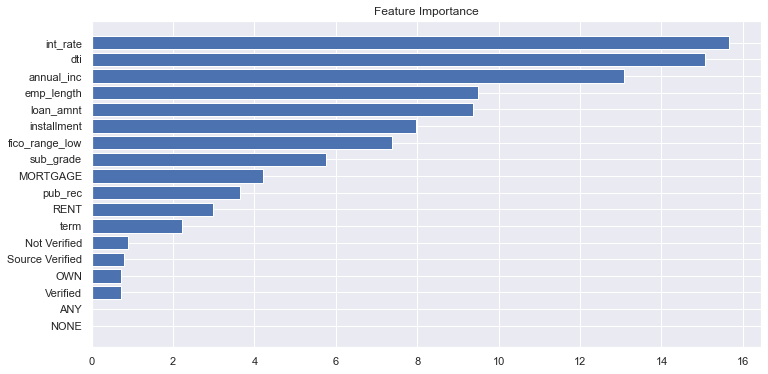

In [26]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

In [29]:
import shap

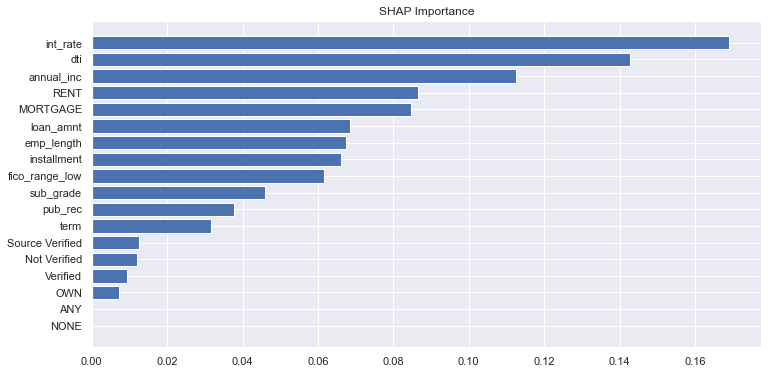

In [30]:
explainer = shap.Explainer(cb)
shap_values = explainer(X)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('SHAP Importance');

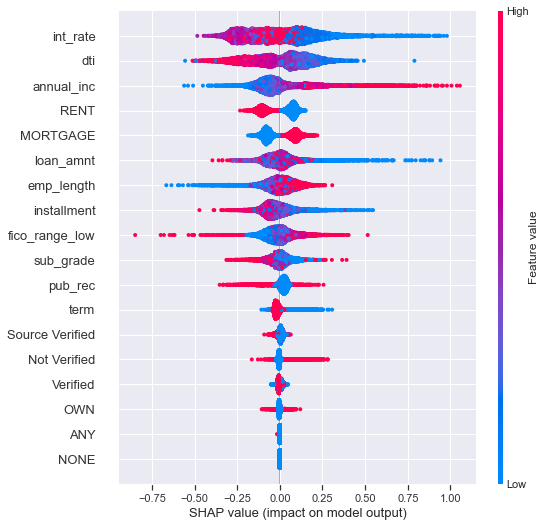

In [32]:
shap.summary_plot(shap_values, max_display=X.shape[0])